In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
poll = pd.read_csv("2012-general-election-romney-vs-obama.csv")
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [3]:
poll.columns
election = poll[['Population','Obama', 'Romney',  'Undecided',  'Affiliation']].copy()

#### 1. Who was being polled and what was their party affiliations?

In [4]:
election['Affiliation'].unique()
rep = election[election['Affiliation'] == 'Rep']['Affiliation']
dem = election[election['Affiliation'] == 'Dem']['Affiliation']
none = election[election['Affiliation'] == 'None']['Affiliation']

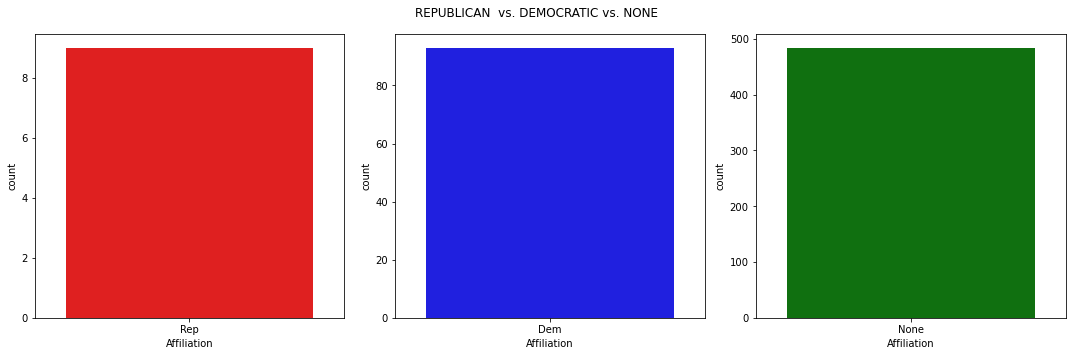

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3)
sns.countplot(x=rep,  ax=axes[0], color='red')
sns.countplot(x=dem, ax=axes[1], color='blue')
sns.countplot(x=none, ax=axes[2], color='green')
fig.set_size_inches(15, 5)
fig.suptitle("REPUBLICAN  vs. DEMOCRATIC vs. NONE", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Florence\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


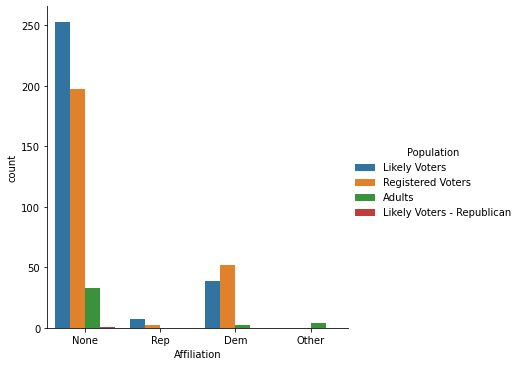

In [6]:
sns.catplot('Affiliation',data=election,kind="count",hue="Population")
plt.show()

Explanation: The people being polled are Likely Voters, Registered Voters, Adults, and Likely Voters(Republican). Their affiliations are Republican, Democratic, None, and other affiliations.

#### 2. Did the poll results favor Romney or Obama?

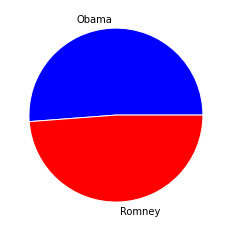

[27597.0, 26298.0]


In [7]:
obama = sum(election['Obama'])
romney = sum(election['Romney'])
pie = [obama, romney]
labels = ['Obama', 'Romney']
colors = ['blue', 'red']
plt.pie(pie, labels = labels, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = colors)
plt.show()
print(pie)

Explanation: Based on the visualization, the poll results favor Obama.

#### 3. How do undecided voters effect the poll?

In [8]:
ave = pd.DataFrame(election.mean())
ave

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099


In [9]:
std = pd.DataFrame(election.std())
std

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614


,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614


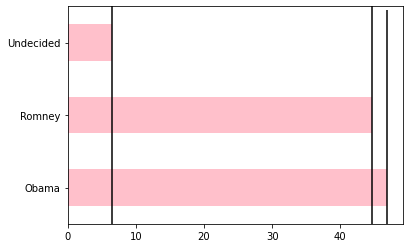

In [11]:
ave.plot(yerr=std, kind='barh', color='pink', legend=False)
results = pd.concat([ave,std], axis =1)
results.columns = ['Average','STD']
results

Explanation: Based on the data, the  undecided voters didn't affect that much the result of the poll. By looking at the average, it only got 6.54 while the decided voters got a total of 91.34.

#### 4. Can we account for the undecided voters?

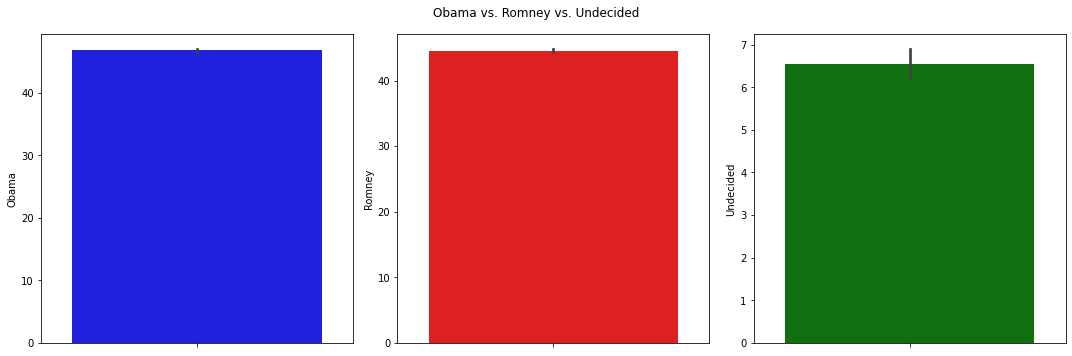

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3)
sns.barplot(y="Obama", data= election,  ax=axes[0], color='blue')
sns.barplot(y="Romney", data= election, ax=axes[1], color = 'red')
sns.barplot(y="Undecided", data= election, ax=axes[2], color = 'green')
fig.set_size_inches(15, 5)
fig.suptitle("Obama vs. Romney vs. Undecided", fontsize=12)
plt.tight_layout()
plt.show()

Explanation: Yes, we can account for the undecided voters. However, based on graph, it won't have that much effect on the poll results.

#### 5. How did voter sentiment change over time?

[]

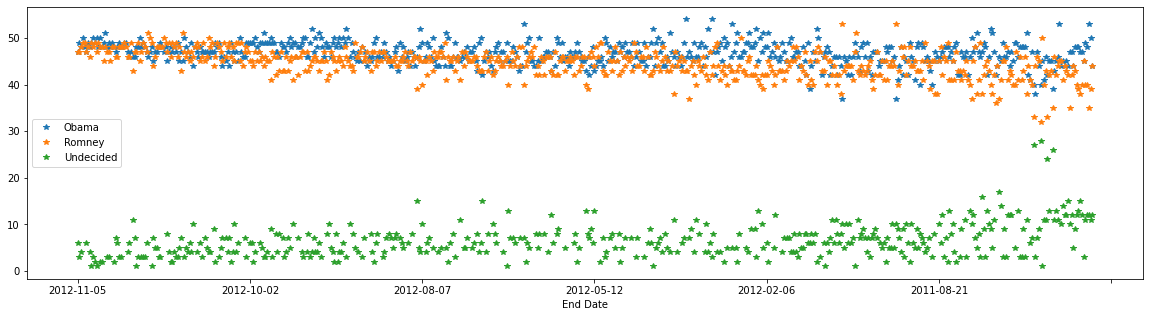

In [14]:
poll.plot(x='End Date', y = ['Obama','Romney','Undecided'],linestyle='',marker='*')
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot()

In [15]:
from datetime import datetime
poll['Difference'] = (poll.Obama - election.Romney)/100
change = poll.groupby(['Start Date'], as_index=False).mean()
change.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


<AxesSubplot:xlabel='Start Date'>

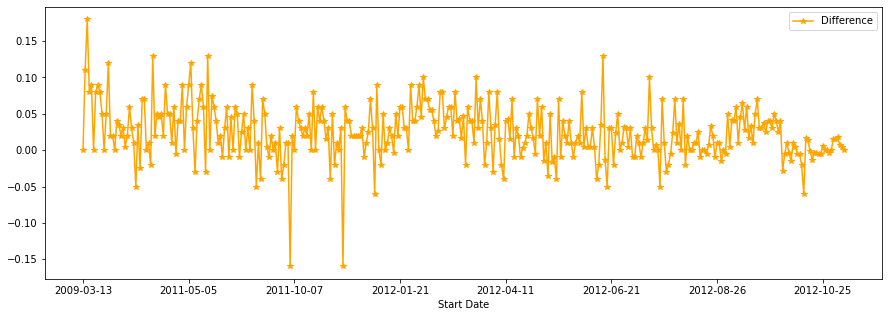

In [16]:
change.plot('Start Date','Difference', figsize=(15,5),marker="*",linestyle='-',color='orange')

Explanation: The above visualization graphs shows the change in voter sentiments overtime.

#### 6. Can we see an effect in the polls from the debates?

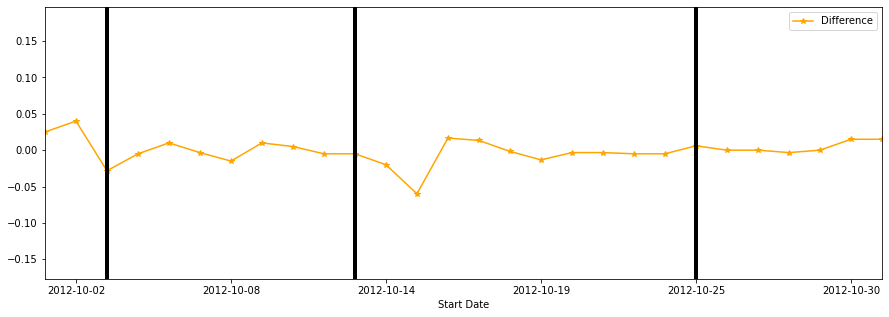

In [17]:
change.plot('Start Date', 'Difference', figsize=(15,5), marker='*', linestyle='-', color='orange', xlim=(329,356))

#debate oct 3rd 
plt.axvline(x=329+2,linewidth=4,color='black')

#debate oct 11th
plt.axvline(x=329+10,linewidth=4,color='black')

#debate oct 22nd
plt.axvline(x=329+21,linewidth=4,color='black')

plt.show()

Explanation: The above graph shows the effect in the polls from the debates. The black line represents the date of debates, and the yellow curve lines represent the poll results.

### Moving Average

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

#### What was the change in price of the stock over time?

In [19]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [20]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-01,3375.860107,3292.020020,3361.800049,3318.110107,3608900.0,3318.110107,AMAZON
2021-11-02,3331.120117,3283.550049,3315.010010,3312.750000,2627600.0,3312.750000,AMAZON
2021-11-03,3394.919922,3297.520020,3309.000000,3384.000000,3397200.0,3384.000000,AMAZON
2021-11-04,3498.629883,3365.000000,3370.000000,3477.000000,5353000.0,3477.000000,AMAZON
2021-11-05,3566.250000,3476.979980,3477.000000,3518.989990,4993500.0,3518.989990,AMAZON
2021-11-08,3579.000000,3487.860107,3523.239990,3488.979980,3074000.0,3488.979980,AMAZON
2021-11-09,3593.770020,3501.429932,3515.250000,3576.229980,4294900.0,3576.229980,AMAZON
2021-11-10,3605.449951,3463.090088,3563.870117,3482.050049,4027400.0,3482.050049,AMAZON
2021-11-11,3543.239990,3467.469971,3513.000000,3472.500000,2264400.0,3472.500000,AMAZON


In [21]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,136.404941,133.723320,135.069092,135.117708,8.976874e+07,134.640020
std,10.641639,10.709219,10.674499,10.710996,2.849242e+07,10.856279
min,115.849998,112.589996,113.910004,113.849998,4.100000e+07,113.152435
25%,127.440002,125.010002,126.010002,126.000000,7.078370e+07,125.538422
50%,135.000000,132.449997,133.800003,133.580002,8.456650e+07,132.959946
75%,146.839996,144.500000,145.470001,145.850006,1.043195e+08,145.429535
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.461655


In [22]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-11-12 to 2021-11-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


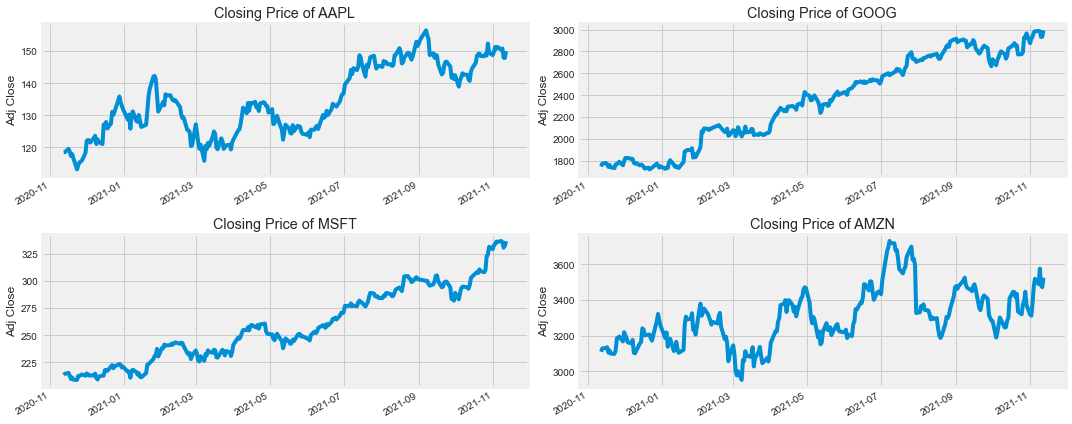

In [23]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

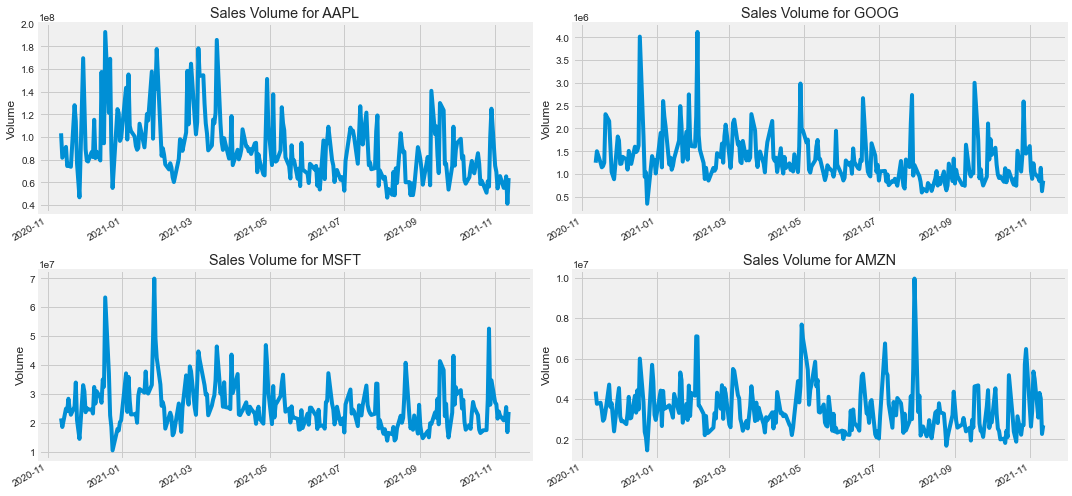

In [24]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

#### What was the daily return of the stock on average? 

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

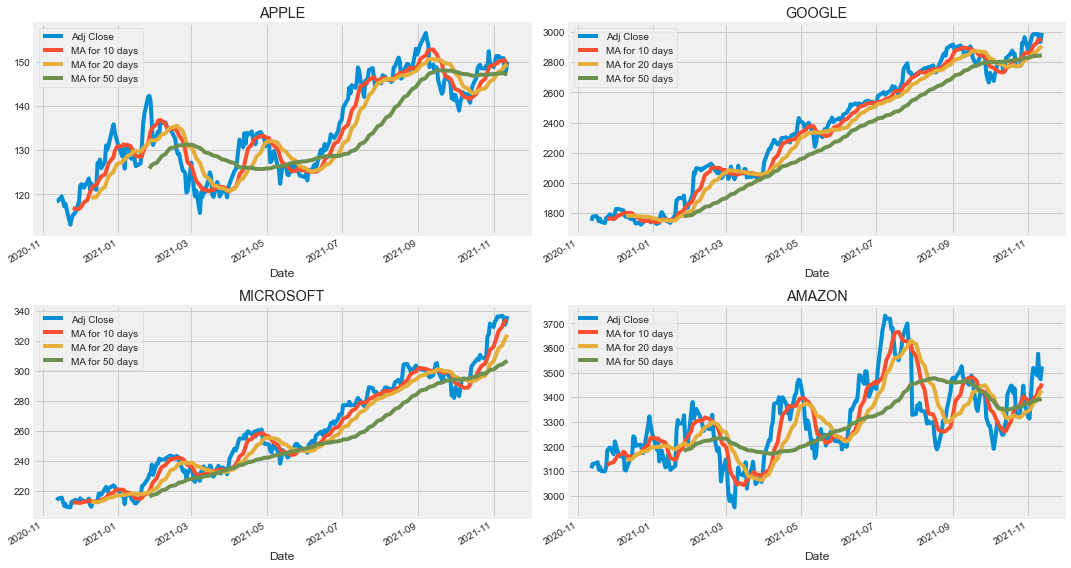

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#### What was the moving average of the various stocks? 

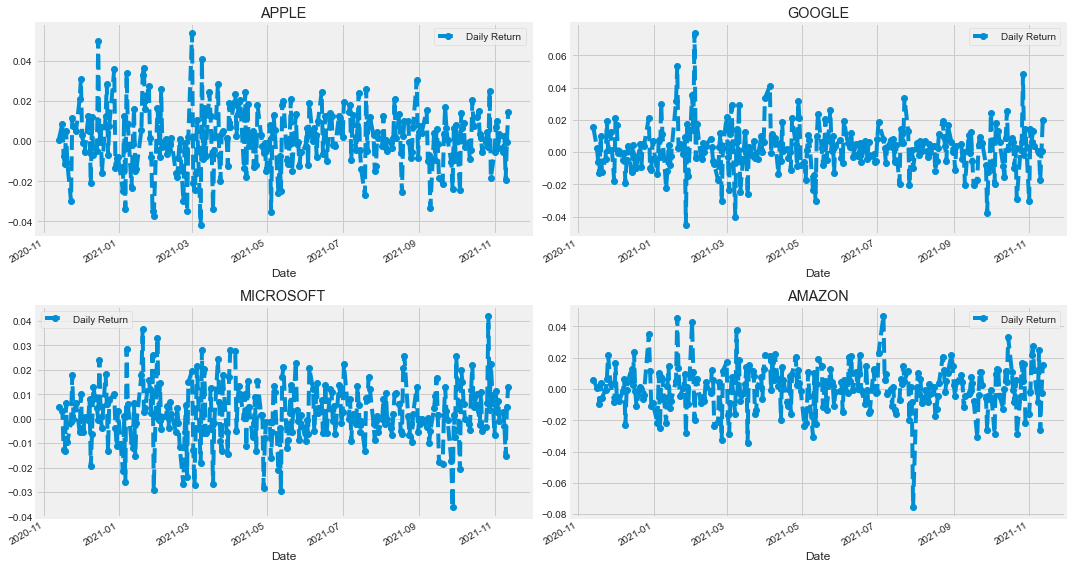

In [27]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\Florence\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Florence\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Florence\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

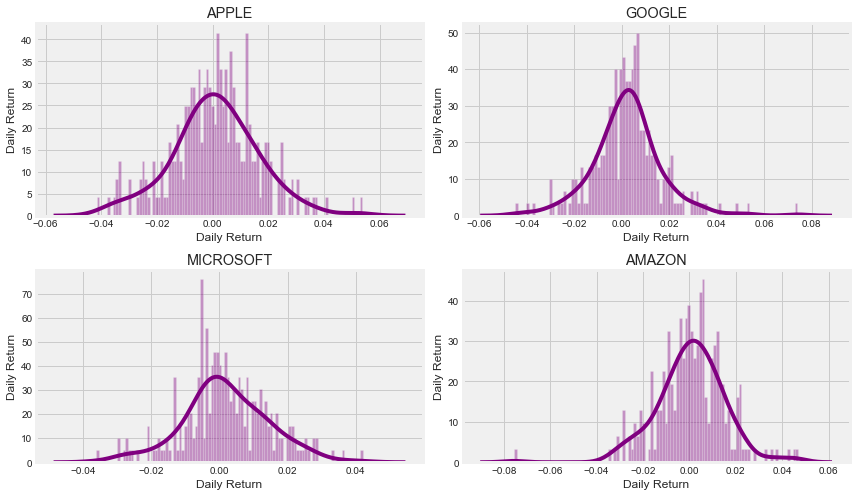

In [28]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

#### What was the correlation between different stocks' closing prices?

In [29]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-12,118.479591,1749.839966,213.481094,3110.280029
2020-11-13,118.529289,1777.020020,214.541367,3128.810059
2020-11-16,119.562920,1781.380005,215.254822,3131.060059
2020-11-17,118.658493,1770.150024,212.510025,3135.659912
2020-11-18,117.306824,1746.780029,209.708328,3105.459961


In [30]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-12,NaN,NaN,NaN,NaN
2020-11-13,0.000419,0.015533,0.004967,0.005958
2020-11-16,0.008720,0.002454,0.003325,0.000719
2020-11-17,-0.007564,-0.006304,-0.012751,0.001469
2020-11-18,-0.011391,-0.013202,-0.013184,-0.009631


C:\Users\Florence\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


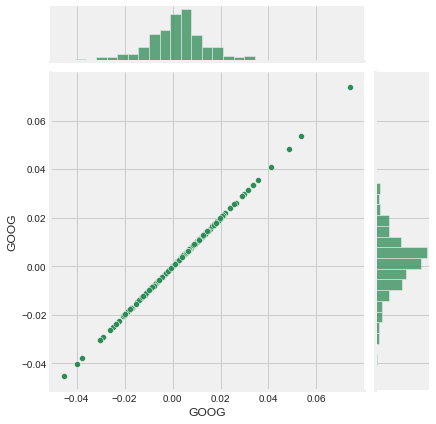

In [31]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

#### What was the correlation between different stocks' daily returns? 

C:\Users\Florence\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


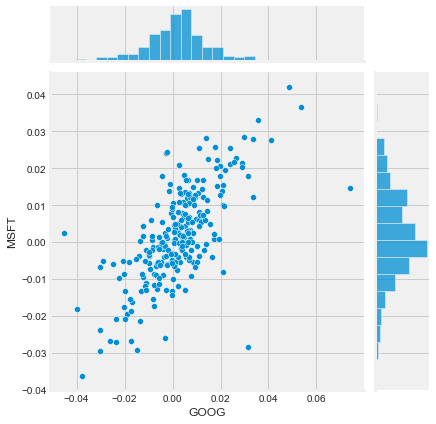

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

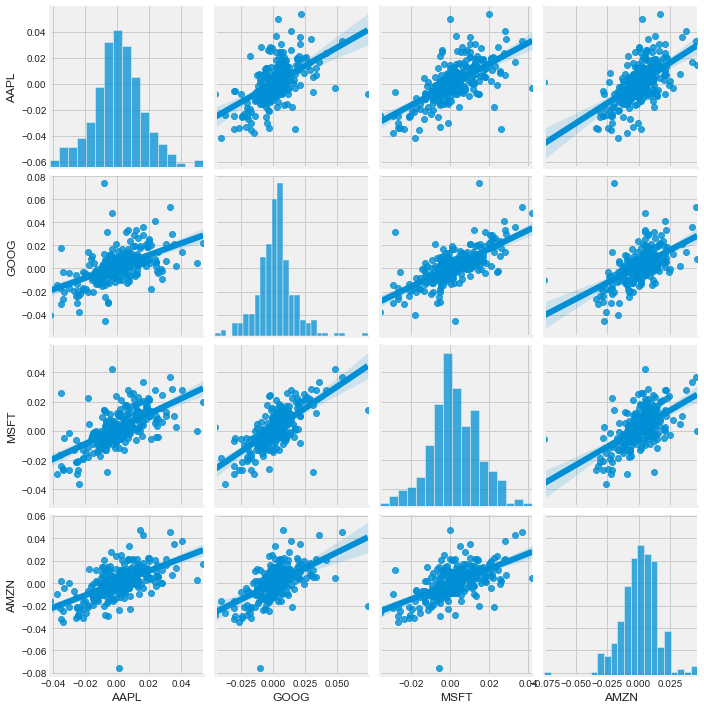

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

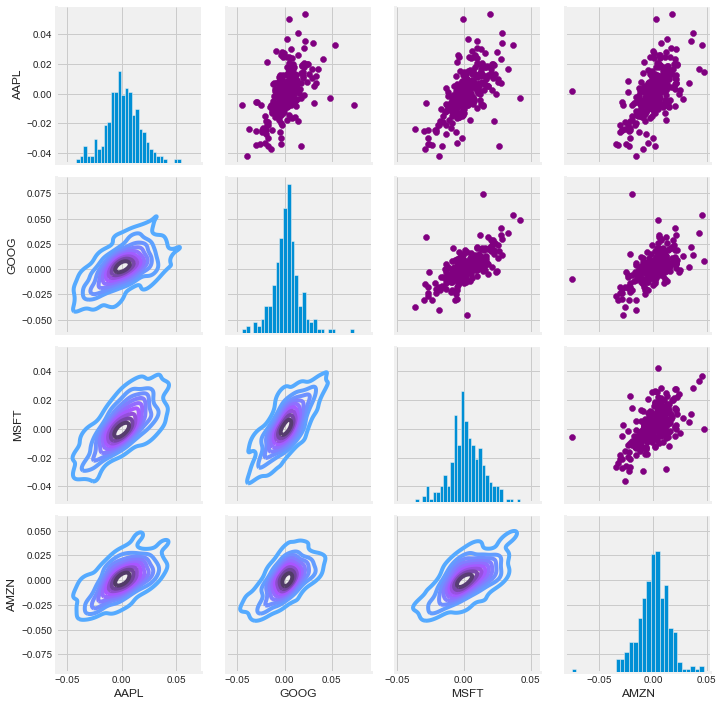

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

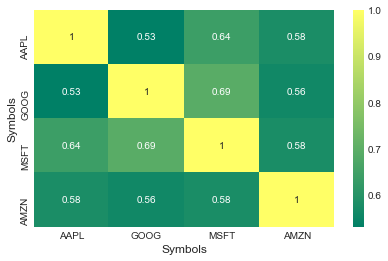

In [35]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

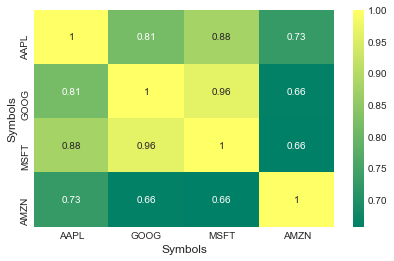

In [36]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

#### How much values do we put at risk by investing in a particular stock?

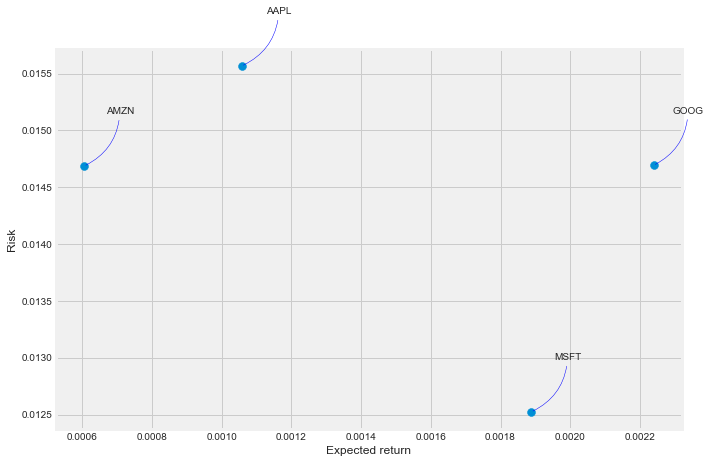

In [37]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#### How can we attempt to predict future stock behavior? 

In [38]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591938
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659611
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800156
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933965
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913451
...,...,...,...,...,...,...
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998


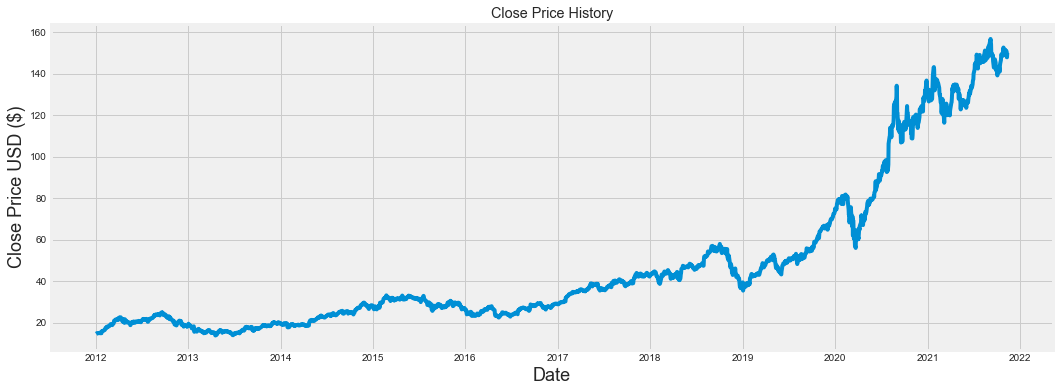

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2360

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.93856067],
       [0.93821036],
       [0.95306235]])

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2300/2300 [==============================] - 31s 13ms/step - loss: 0.0013


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.085375955163005

<ipython-input-45-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


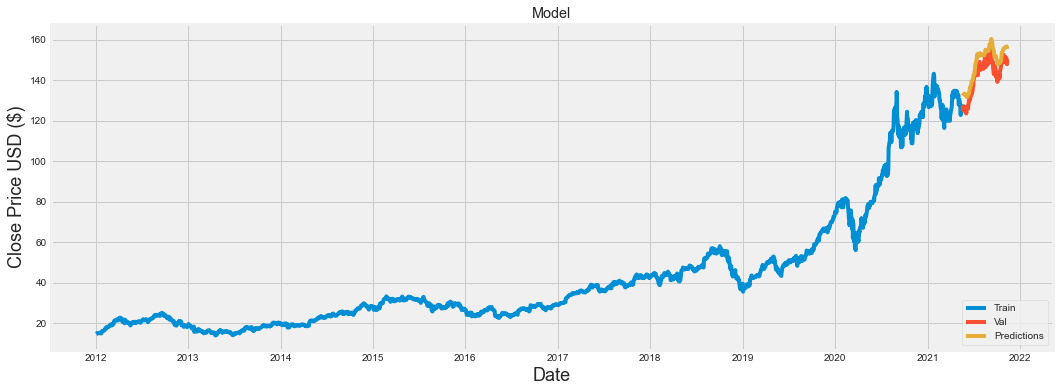

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-20,127.309998,132.301834
2021-05-21,125.430000,132.567200
2021-05-24,127.099998,132.642395
2021-05-25,126.900002,132.935440
2021-05-26,126.849998,133.223633
...,...,...
2021-11-08,150.440002,156.527771
2021-11-09,150.809998,156.581390
2021-11-10,147.919998,156.615082
